In [1]:
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import latexify

%matplotlib inline

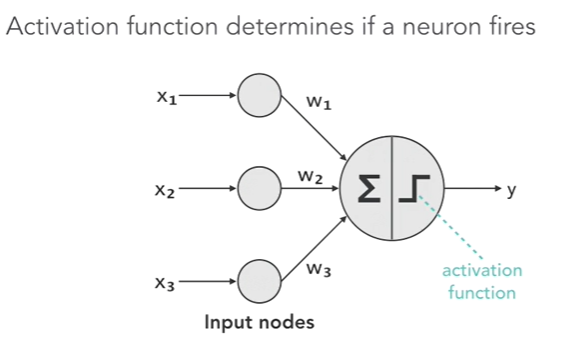

In [2]:
from IPython.display import Image
Image(filename='data/activation_function_neuron.png')

# What is an activation function?
- An activation function is one that outputs a smaller value for tiny inputs and a higher value for inputs that are greater than a threshold value.
- By generating a weighted sum and addition bias with it, the activation function determines whether a neuron should be turned on. 

# Types of activation functions -
1. Linear activation function
2. Non-linear activation function

# Why do we require an activation function?
- As they can introduce non-linearity in neural networks (NN), thus enabling the NN to learn powerful operations.
- If activation functions are taken out from a feed-forward network, the network might be refactored into straightforward linear function or matrix transformation.

# Why do we require non-linearity?
- Input is transformed nonlinearly by the activation function, allowing the system to learn and perform more challenging tasks.
- The mixture of two linear functions yields a linear function in itself, so no matter how several hidden layers we add to a neural network, they all will behave in the same way. The neuron cannot learn if all it has is a linear model.

# Linear activation functions -

## Binary Step Activation Function
Binary step function returns value either 0 or 1.

It returns '0' if the input is the less than threshold
It returns '1' if the input is greater than threshold

In [3]:
# Code for binary step activation function
def binary_step(x:int, threshold:int=0):
    ''' It returns '0' if the input is less than the threshold otherwise it returns one '''
    return np.heaviside(x,1)

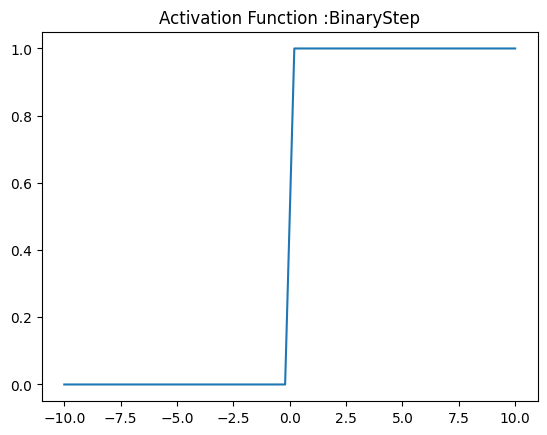

In [4]:
x = np.linspace(-10, 10)
plt.plot(x, binary_step(x, threshold=0))
plt.axis('tight')
plt.title('Activation Function :BinaryStep')
plt.show()

## Linear Activation Function
It returns what it gets as input.

In [5]:
def linear(x):
    ''' y = f(x) It returns the input as it is'''
    return x

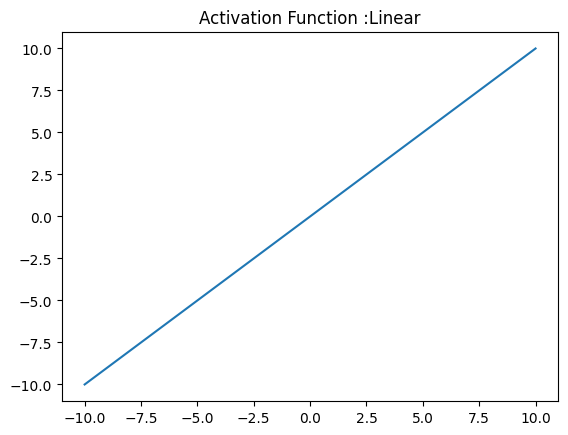

In [6]:
x = np.linspace(-10, 10)
plt.plot(x, linear(x))
plt.axis('tight')
plt.title('Activation Function :Linear')
plt.show()

# Non-Linear activation functions -

# Sigmoid Activation Function
- Value Range :- [0, 1]
- The output is not Zero-Centered
- Sigmoid function is considered not good since near the boundaries the network doesn't learn quickly. This is because the gradient is almost zero near the boundaries.

In [7]:
def sigmoid(x):
    ''' It returns 1/(1+exp(-x)). where the values lies between zero and one '''
    return 1/(1+np.exp(-x))

### Derivative of Sigmoid activation function

In [8]:
# Code for the derivative of sigmoid
def der_sigmoid(x):
    # f = 1/(1+exp(-x))
    # df = f * (1 - f)
    f = sigmoid(x)
    df =  f * (1-f)
    return df

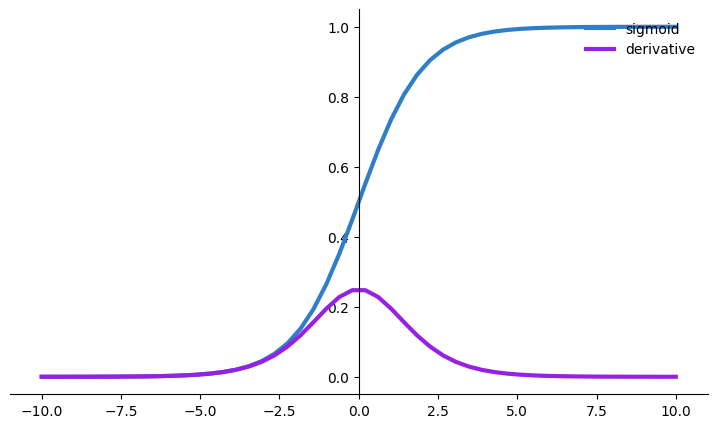

In [27]:
x = np.linspace(-10, 10)
# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(x,sigmoid(x), color="#307EC7", linewidth=3, label="sigmoid")
ax.plot(x,der_sigmoid(x), color="#9621E2", linewidth=3, label="derivative")
ax.legend(loc="upper right", frameon=False)
plt.show()

## Tanh Activation Function
- Value Range :- [-1, 1]
- The output is Zero-Centered
- Tanh also suffers from vanishing gradient problem near the boundaries just as the Sigmoid activation function does.

In [23]:
# code for tanh activation function
def tanh(x):
    ''' It returns the value (1-exp(-2x))/(1+exp(-2x)) and the value returned lies in between -1 to 1.'''
    # return np.tanh(x)
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

In [24]:
# Code for the derivative of tanh
def der_tanh(x):
    # f = 1/(1+exp(-x))
    # df = f * (1 - f)
    f = tanh(x)
    df =  1-f**2
    return df

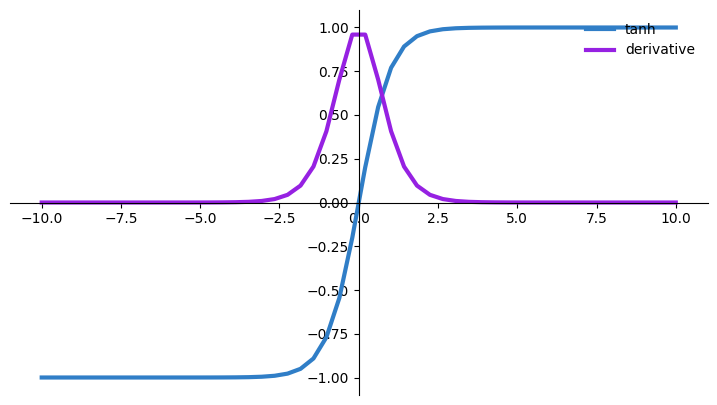

In [26]:
z = np.linspace(-10, 10)
# Setup centered axes
# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(z,tanh(z), color="#307EC7", linewidth=3, label="tanh")
ax.plot(z,der_tanh(z), color="#9621E2", linewidth=3, label="derivative")
ax.legend(loc="upper right", frameon=False)
plt.show()

## ReLU activation function
- Value Range :- [0, inf)
- Less computationally expensive than tanh and sigmoid as it involves simpler mathematical operations.
- Avoids and rectifies vanishing gradient problem.
- Some gradients can be fragile during training and can die, resulting in **dead neurons**.

In [39]:
@latexify.expression
def RELU(x):
    return np.maximum(0, x)
RELU

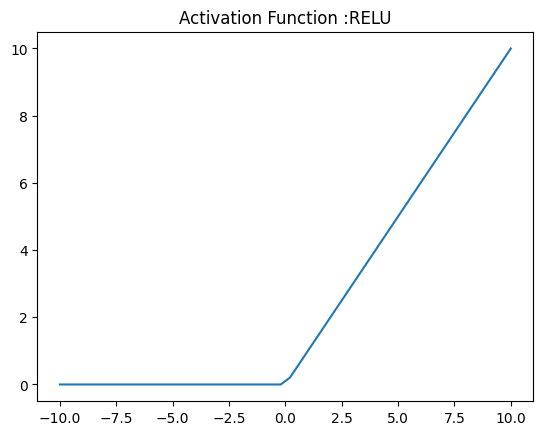

In [40]:
x = np.linspace(-10, 10)
plt.plot(x, RELU(x))
plt.axis('tight')
plt.title('Activation Function :RELU')
plt.show()

## Leaky ReLU activation function
- Fixes the problem of dying neurons.
- It introduces a small slope to keep the updates alive.

In [6]:
# code for the LeakyReLU function
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

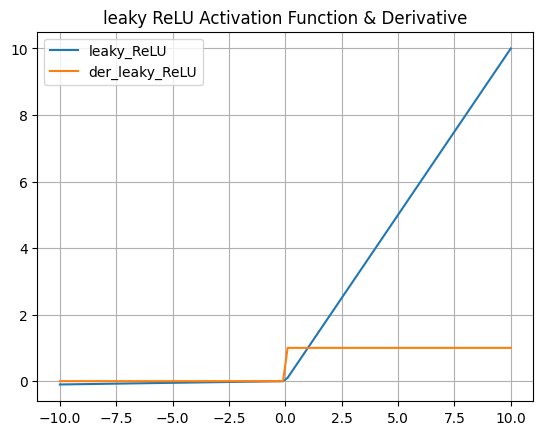

In [7]:
# Derivative for leaky ReLU 
def der_leaky_ReLU(x, alpha=0.01):
    f = leaky_relu(x)
    return [1 if i>0 else 0 for i in f]

# Generating data For Graph
x_data = np.linspace(-10,10,100)
y_data = leaky_relu(x_data)
dy_data = der_leaky_ReLU(x_data)

# Graph
plt.plot(x_data, y_data, x_data, dy_data)
plt.title('leaky ReLU Activation Function & Derivative')
plt.legend(['leaky_ReLU','der_leaky_ReLU'])
plt.grid()
plt.show()

## Softmax Activation Function
- Softmax turns logits, the numeric output of the last linear layer of a multi-class classification neural network into probabilities.

In [9]:
# Code for softmax function
def softmax(x):
    ''' Compute softmax values for each sets of scores in x. '''
    return np.exp(x) / np.sum(np.exp(x), axis=0)

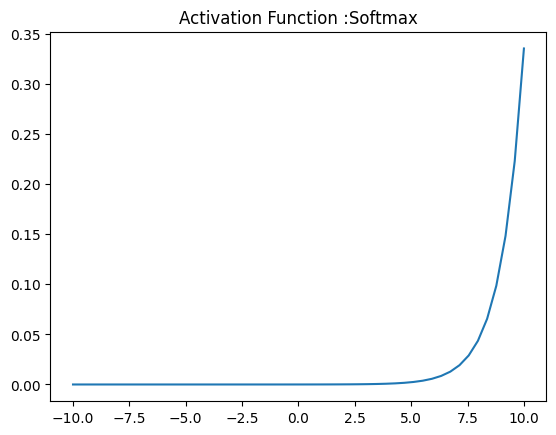

In [10]:
x = np.linspace(-10, 10)
plt.plot(x, softmax(x))
plt.axis('tight')
plt.title('Activation Function :Softmax')
plt.show()